In [23]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

torch.set_printoptions(edgeitems=2, linewidth=75)

In [24]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 

t_u.shape

torch.Size([11, 1])

In [25]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9, 10,  0,  4,  1,  5,  6,  3,  7]), tensor([2, 8]))

In [26]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [27]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1> input shape and output shape
linear_model(t_un_val)

tensor([[4.0349],
        [3.5011]], grad_fn=<AddmmBackward0>)

In [28]:
linear_model.weight

Parameter containing:
tensor([[0.5447]], requires_grad=True)

In [29]:
linear_model.bias

Parameter containing:
tensor([0.8648], requires_grad=True)

In [30]:
x = torch.ones(1)
linear_model(x)

tensor([1.4095], grad_fn=<ViewBackward0>)

In [31]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.4095],
        [1.4095],
        [1.4095],
        [1.4095],
        [1.4095],
        [1.4095],
        [1.4095],
        [1.4095],
        [1.4095],
        [1.4095]], grad_fn=<AddmmBackward0>)

In [32]:
linear_model = nn.Linear(1, 1) # <1> model
optimizer = optim.SGD(
    linear_model.parameters(), # <2> optimizer
    lr=1e-2)

In [33]:
linear_model.parameters()

<generator object Module.parameters at 0x12a6a4cf0>

In [34]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.5888]], requires_grad=True),
 Parameter containing:
 tensor([-0.3887], requires_grad=True)]

In [35]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1> training loss
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val) # <1> vaildation loss
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2> back propagation
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")        

In [36]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1> linear model here
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 272.7635, Validation loss 187.8904
Epoch 1000, Training loss 3.2158, Validation loss 5.7183
Epoch 2000, Training loss 2.6261, Validation loss 4.6929
Epoch 3000, Training loss 2.6160, Validation loss 4.5659

Parameter containing:
tensor([[5.3052]], requires_grad=True)
Parameter containing:
tensor([-16.7999], requires_grad=True)


In [37]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 276.1744, Validation loss 190.9846
Epoch 1000, Training loss 3.2127, Validation loss 5.7151
Epoch 2000, Training loss 2.6261, Validation loss 4.6925
Epoch 3000, Training loss 2.6160, Validation loss 4.5659

Parameter containing:
tensor([[5.3052]], requires_grad=True)
Parameter containing:
tensor([-16.8000], requires_grad=True)


In [38]:
seq_model = nn.Sequential(
            nn.Linear(1, 11), # <1> hidden layer
            nn.Tanh(),
            nn.Linear(11, 1)) # <1> output layer
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=11, bias=True)
  (1): Tanh()
  (2): Linear(in_features=11, out_features=1, bias=True)
)

In [39]:
from collections import OrderedDict

namedseq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 12)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(12 , 1))
]))

namedseq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=12, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=12, out_features=1, bias=True)
)

In [40]:
optimizer = optim.SGD(
    namedseq_model.parameters(), # <2> optimizer for new model
    lr=1e-3) # lr switchs to 0.001

In [41]:
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = namedseq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', namedseq_model(t_un_val))
print('answer', t_c_val)
print('hidden', namedseq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 180.6454, Validation loss 111.3414
Epoch 1000, Training loss 3.8297, Validation loss 2.8264
Epoch 2000, Training loss 3.3628, Validation loss 3.6931
Epoch 3000, Training loss 2.1912, Validation loss 3.0749
Epoch 4000, Training loss 1.8371, Validation loss 3.0990
Epoch 5000, Training loss 1.7512, Validation loss 3.3228
output tensor([[13.7225],
        [ 7.9751]], grad_fn=<AddmmBackward0>)
answer tensor([[15.],
        [ 6.]])
hidden tensor([[-6.4193e-01],
        [-4.7715e-03],
        [ 5.9532e-03],
        [-9.9590e-01],
        [ 1.7403e+00],
        [ 1.0601e+01],
        [-1.0879e+01],
        [-9.3575e+00],
        [ 9.6163e+00],
        [ 9.6966e-04],
        [-1.6091e+00],
        [ 1.1185e+00]])


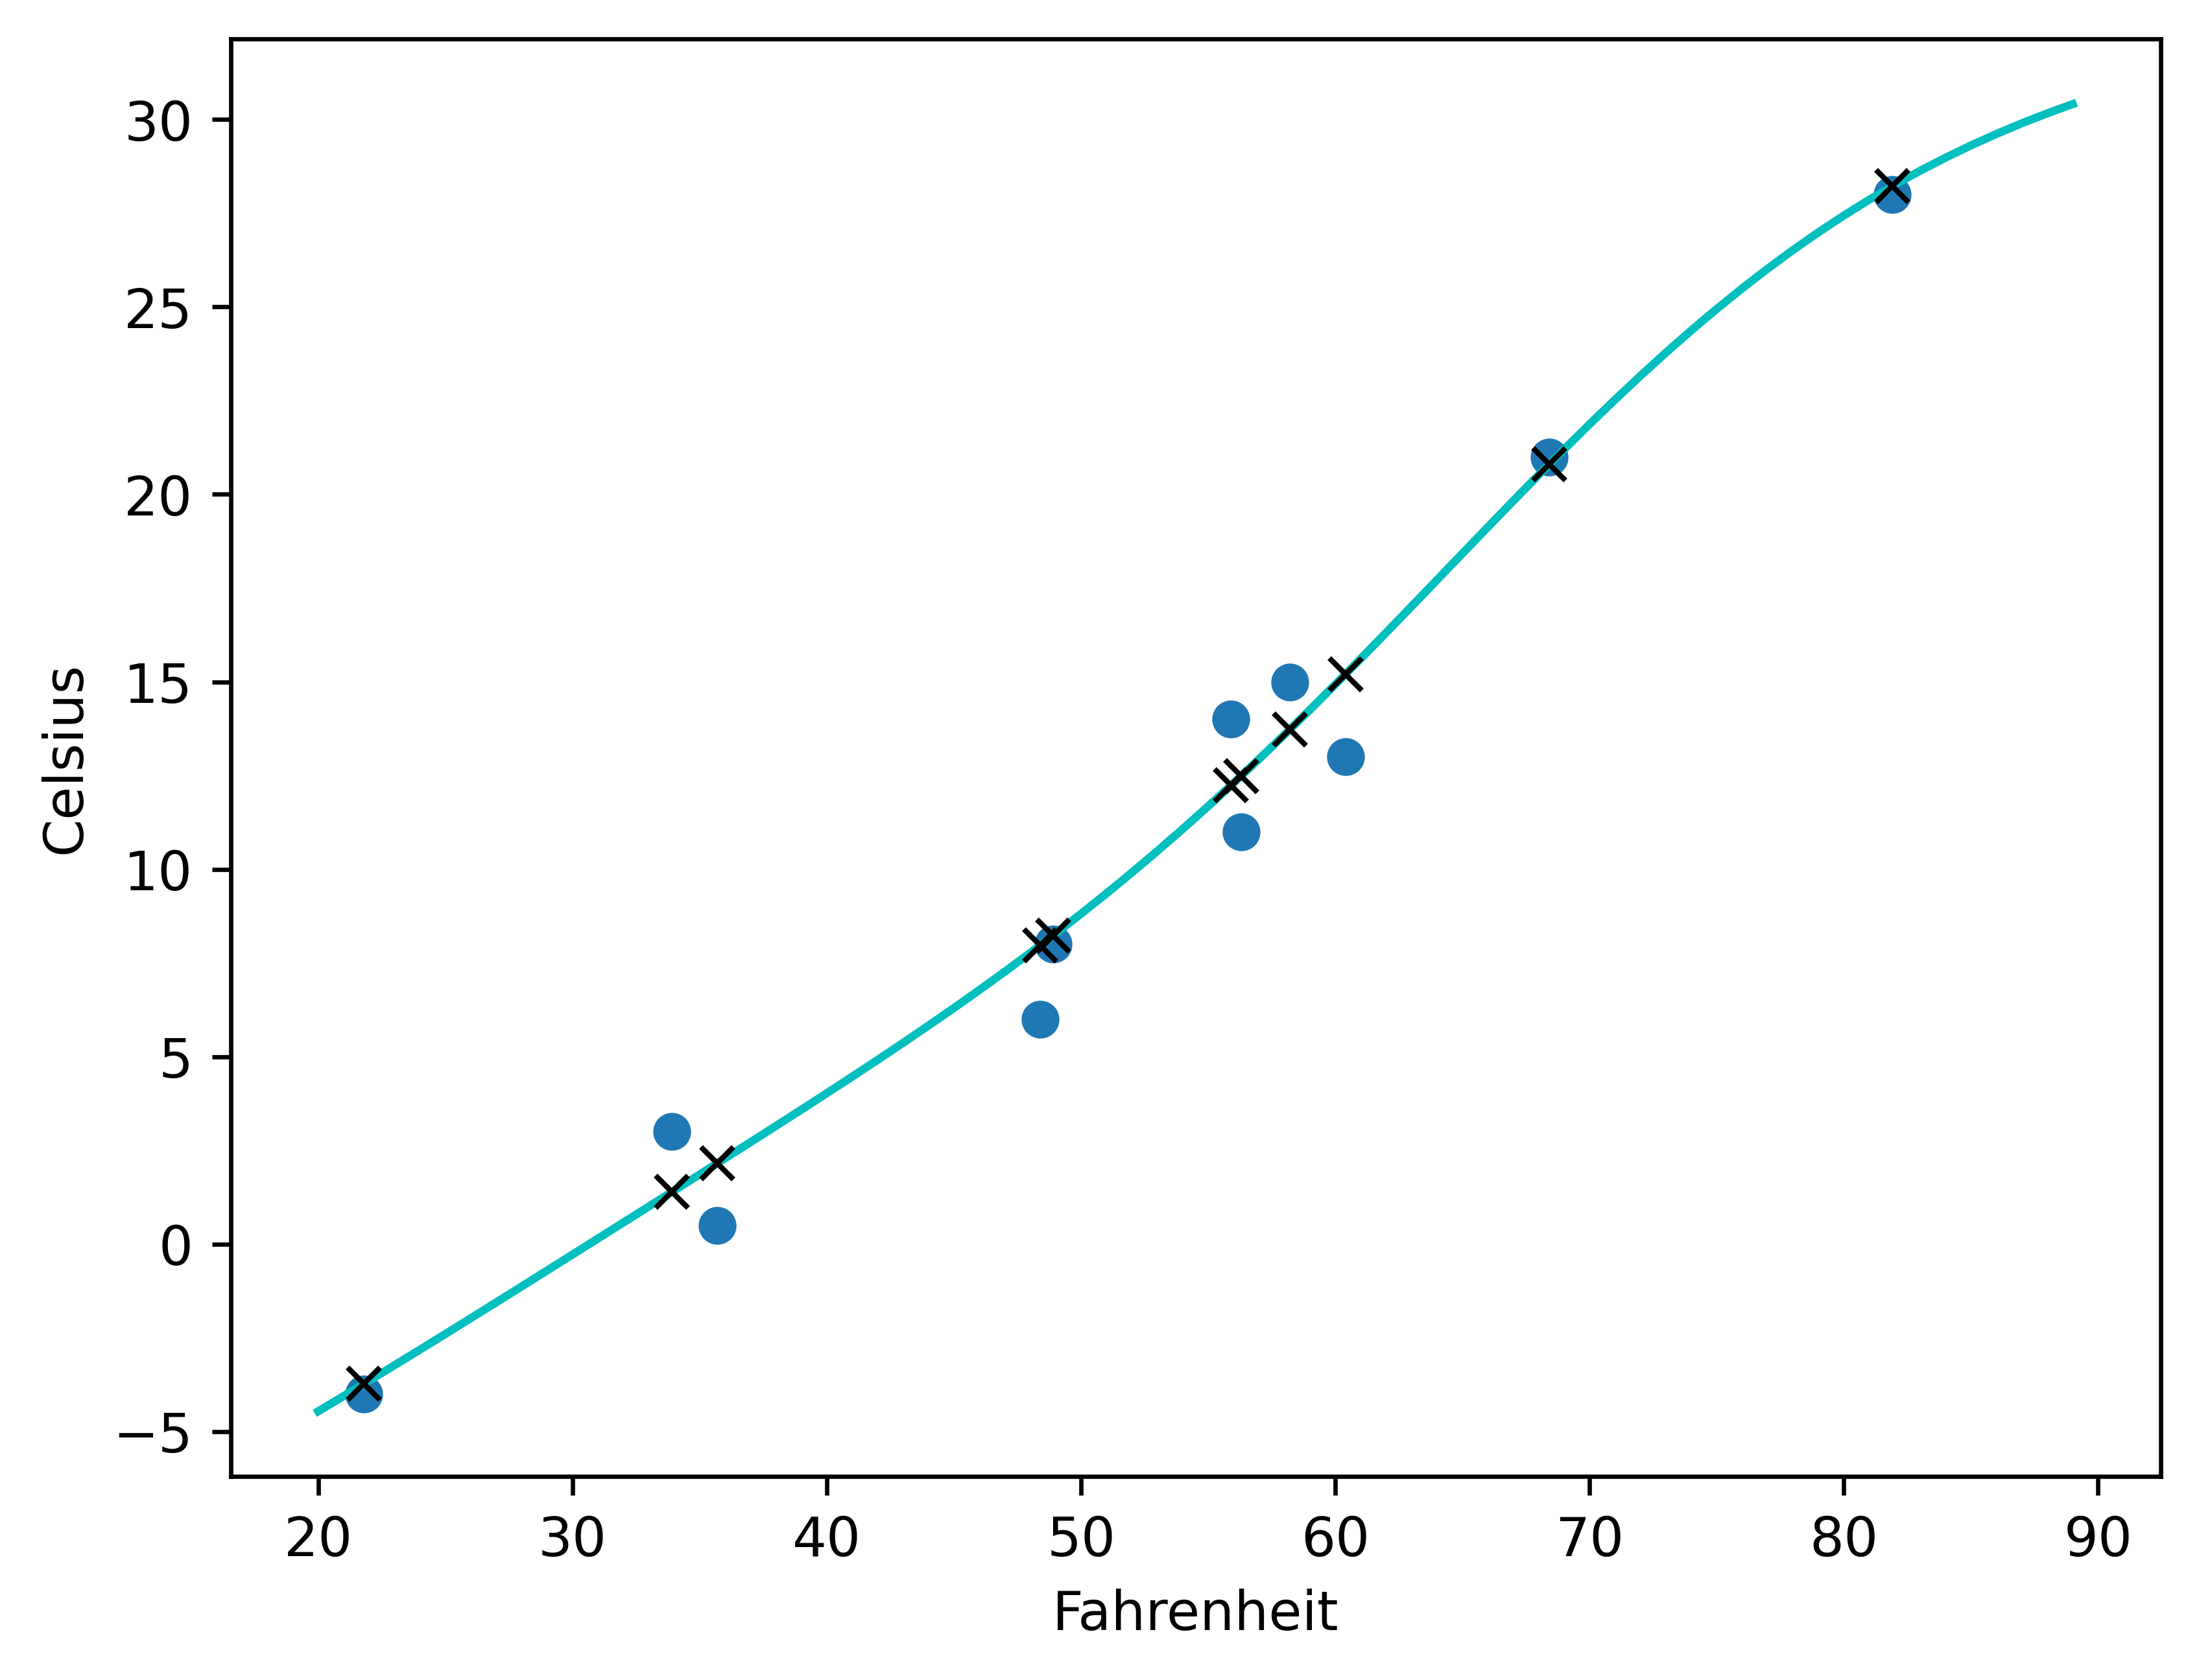

In [42]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), namedseq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), namedseq_model(0.1 * t_u).detach().numpy(), 'kx')